In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Dataset/PS_20174392719_1491204439457_log.csv')

<h1>1. General Overview </h1>

<h3>Datasets structure</h3>

In [4]:
df.shape

(6362620, 11)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In the dataset, there are 5 types or transatctions spread across 743 different time stamps. The nameOrig column has 6353307 unique value out of 6362620 total rows, meaning 9313 people have conducted multiple transactions.

<h1>2. Data Cleaning</h1>

<h3>Checking for missing value</h3>

In [8]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

<h3> Checking for duplicate value </h3>

In [9]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


<h3>Checking for outliers</h3>

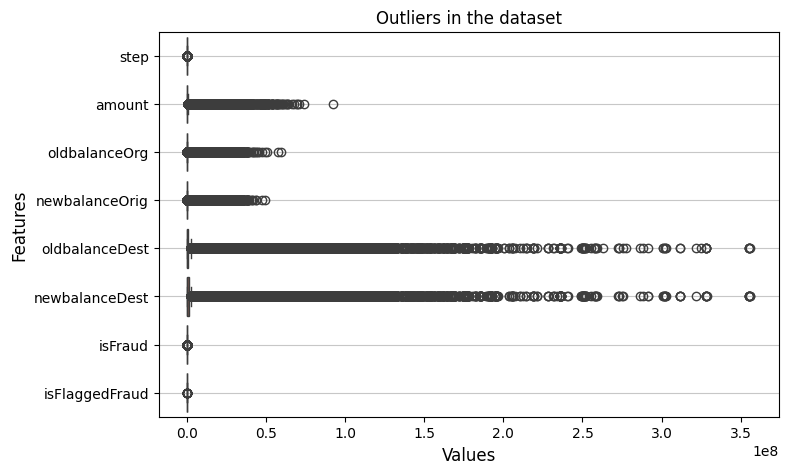

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, orient='h')
plt.title('Outliers in the dataset')

# Customize the visualization
plt.xlabel('Values', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.7)
plt.show()

<h1>3. Explanatory Data Analysis</h1>

<h3>Analysis on the 'Type' field</h3>

In [11]:
type_percentages = round(df['type'].value_counts(normalize=True) * 100, 2)
print(type_percentages)

type
CASH_OUT    35.17
PAYMENT     33.81
CASH_IN     21.99
TRANSFER     8.38
DEBIT        0.65
Name: proportion, dtype: float64


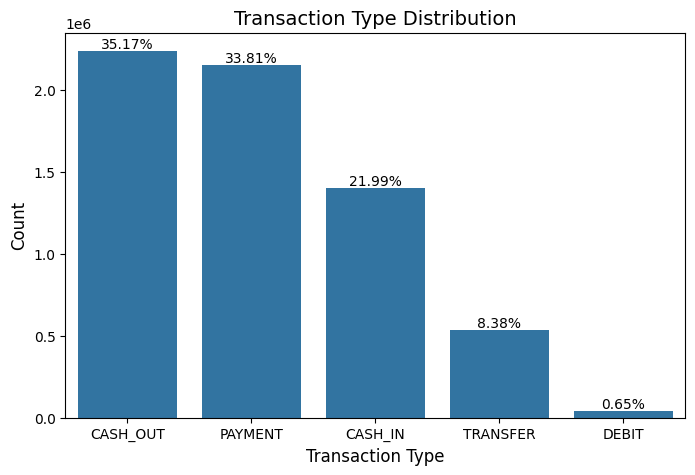

In [12]:
plt.figure(figsize=(8,5))
type_countplot = sns.countplot(x='type', data=df, order=type_percentages.index)

# Add labels to bars
for p in type_countplot.patches:
    percentage = round((p.get_height() / len(df)) * 100, 2)
    type_countplot.annotate(f'{percentage}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Transaction Type Distribution", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

<h3>Analysis on the 'isFraud' field</h3>

In [13]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

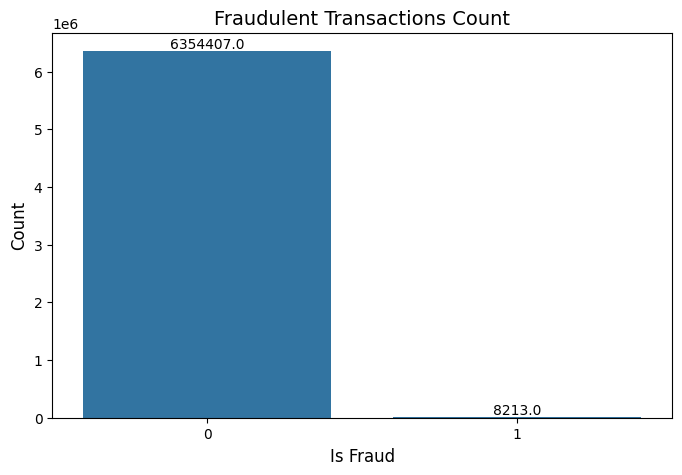

In [14]:
plt.figure(figsize=(8, 5))
is_fraud_countplot = sns.countplot(x='isFraud', data=df)

# Add labels to bars
for p in is_fraud_countplot.patches:
    count = p.get_height()
    is_fraud_countplot.annotate(f'{count}', 
                                (p.get_x() + p.get_width() / 2., count), 
                                ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Fraudulent Transactions Count", fontsize=14)
plt.xlabel("Is Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

The dataset is extremely imbalanced and require a further feature engineering before using it to train a machine learning <br> Suggestion: Balance the dataset with undersampling (SMOTE) or oversampling

<h3> Variables Distribution </h3>

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

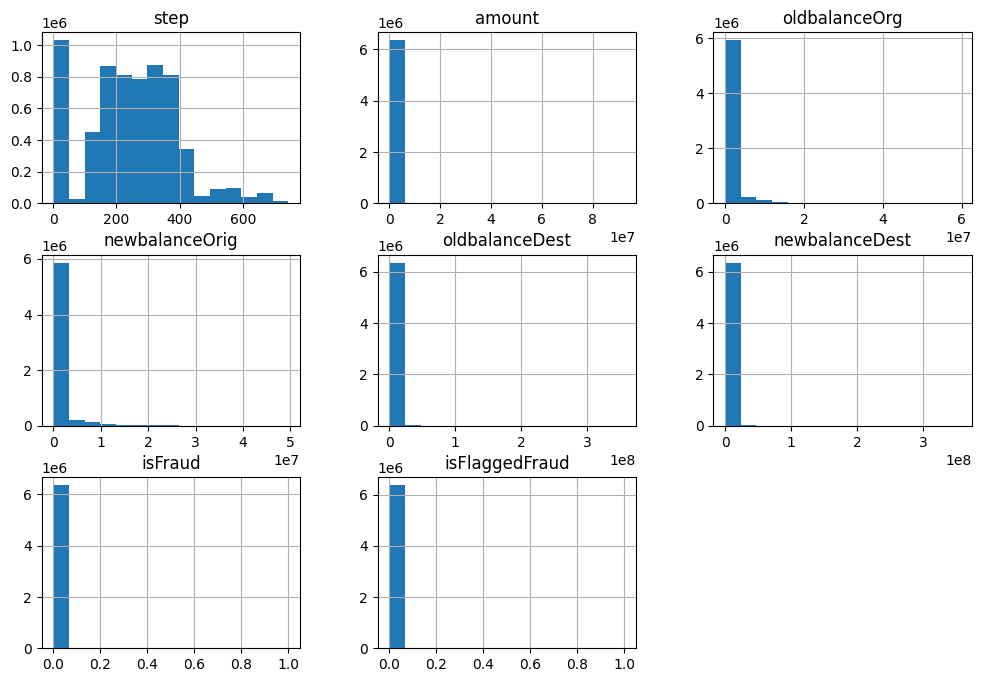

In [15]:
df.hist(figsize=(12, 8), bins=15)

<h3>Correlation between variables</h3>

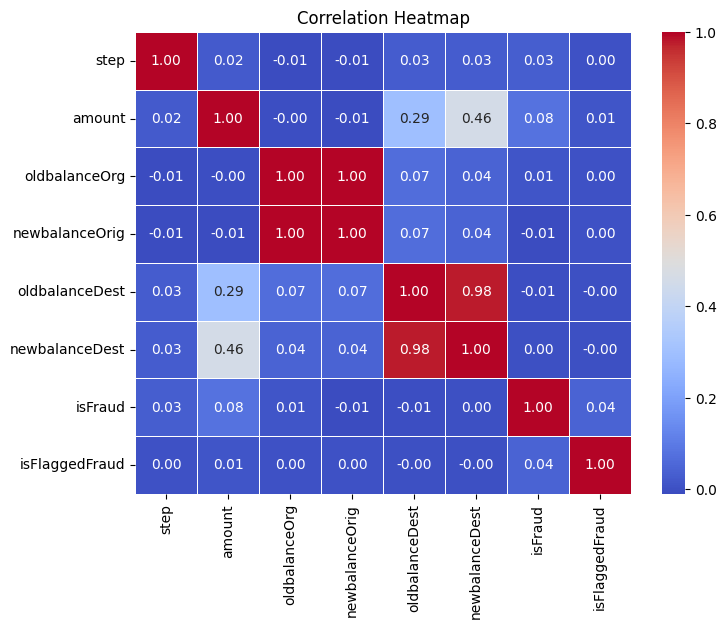

In [16]:
numeric_df = df.select_dtypes(include=['number'])
correlation_table = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<h3> Network Analysis</h3>

In [17]:
G = nx.from_pandas_edgelist(df, source='nameOrig', target='nameDest', edge_attr=['amount', 'isFraud'], create_using=nx.DiGraph)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 9073900
Number of edges: 6362620


In [18]:
density = nx.density(G)
reciprocity = nx.reciprocity(G)
transitivity = nx.transitivity(G)
clustering_coeffs = nx.clustering(G)
average_clustering = sum(clustering_coeffs.values()) / len(clustering_coeffs)

print("Graph Density:", density)
print("Reciprocity:", reciprocity)
print("Transitivity:", transitivity)
print("Average Local Clustering Coefficient:", average_clustering)


Graph Density: 7.727660903787649e-08
Reciprocity: 0.0
Transitivity: 0
Average Local Clustering Coefficient: 0.0


The network analysis shows that the fraud dataset creates a very sparse and disconnected graph, with no reciprocity, transitivity, or local clustering between users. This may suggest that the dataset contains isolated transactions for both fraud and non-fraudulent transactions, meaning that transactions occur separately rather than in groups here.

<h3> Network Analysis on Fraud label

Text(0.5, 1.0, 'Network Graph of Fraudulent Transactions (Amount = 10k)')

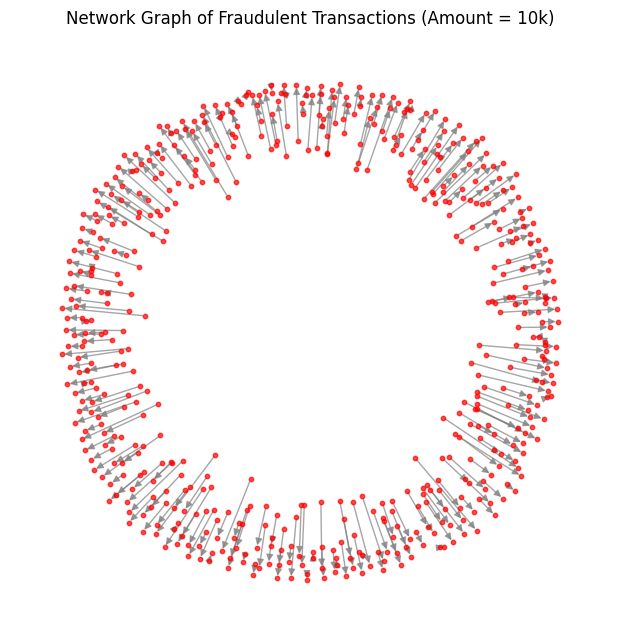

In [20]:
fraud_df_10k = df[(df['amount'] == 10000000) & (df['isFraud'] == 1)] #$1M is the most frequent transaction amount in the dataset

G_fraud_10k = nx.from_pandas_edgelist(fraud_df_10k, source='nameOrig', target='nameDest', edge_attr=['amount', 'isFraud'], create_using=nx.DiGraph)

plt.figure(figsize=(6, 6))
nx.draw(G_fraud_10k, with_labels=False, node_size=10, alpha=0.7, node_color='red', edge_color='gray')
plt.title("Network Graph of Fraudulent Transactions (Amount = 10k)")

In [ ]:
density_fraud = nx.density(G_fraud_10k)
reciprocity_fraud = nx.reciprocity(G_fraud_10k)
transitivity_fraud = nx.transitivity(G_fraud_10k)
clustering_coeffs_fraud = nx.clustering(G_fraud_10k)
average_clustering_fraud = sum(clustering_coeffs.values()) / len(clustering_coeffs)

print("Graph Density:", density)
print("Reciprocity:", reciprocity)
print("Transitivity:", transitivity)
print("Average Local Clustering Coefficient:", average_clustering)


Graph Density: 0.0008726003490401396
Reciprocity: 0.0
Transitivity: 0
Average Local Clustering Coefficient: 0.0


Even when isolating only the fraud-labeled transactions, the graph still faces the same issues as the full fraudulent transaction network. It has extremely low density, no reciprocity, no transitivity, and no local clustering. We may conclude that there is low evidence of mutual transactions or organized fraud networks happening here, suggesting that fraudsters operate individually or using one-way transactions to run away with the funds. Given these characteristics, graph analysis may not be the most effective method for detecting fraud in this dataset.

<h1> 4. Investigating Fraud Patterns

<h3>1. What type of transactions are more likely to be fraudulent?</h3>

In [ ]:
fraud_types = round(df.loc[df['isFraud'] == 1, 'type'].value_counts(normalize=True) * 100, 2)
print(fraud_types)

type
CASH_OUT    50.12
TRANSFER    49.88
Name: proportion, dtype: float64


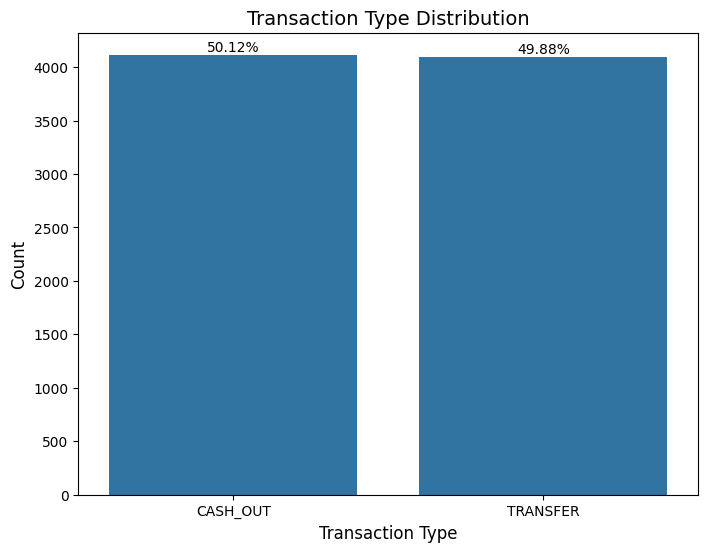

In [ ]:
plt.figure(figsize=(8,6))
type_countplot = sns.countplot(x='type', data=df[df['isFraud']==1], order=fraud_types.index)

# Add labels to bars
for p in type_countplot.patches:
    percentage = round((p.get_height() / len(df[df['isFraud']==1])) * 100, 2)
    type_countplot.annotate(f'{percentage}%', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title("Transaction Type Distribution", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Fraudulent transactions occur only in CASH_OUT and TRANSFER types, with nearly equal distribution. Although TRANSFER accounts for only 8.3% of all transactions in the dataset, it is primarily used for online fraud. Furthermore, 50% CASH_OUT may suggest that fraudsters mainly move money for quick cash withdrawal and to escape with the funds.

<h3>2. Is higher time stamp suggest a greater amount of fraud?</h3>

In [ ]:
correlation = df['amount'].corr(df['step'])
print(f"Correlation between 'amount' and 'step': {correlation}")

Correlation between 'amount' and 'step': 0.022372994674588604


C:\Users\faldh\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


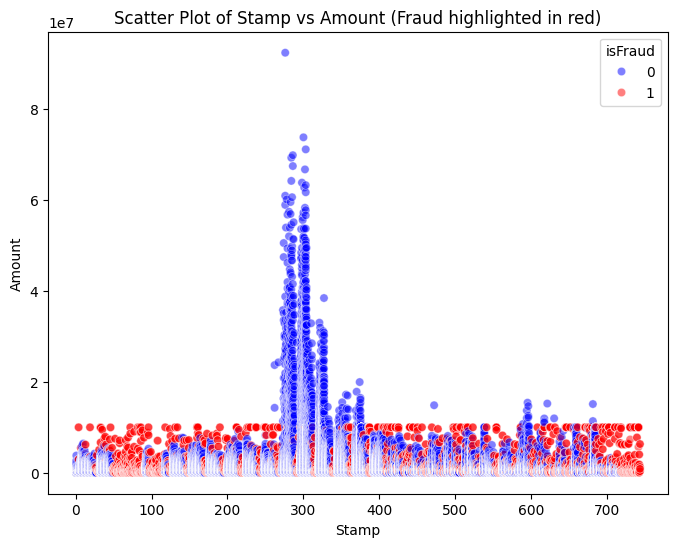

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='step', y='amount', data=df, hue='isFraud', palette={0: 'blue', 1: 'red'}, alpha=0.5)
plt.title('Scatter Plot of Stamp vs Amount (Fraud highlighted in red)')
plt.xlabel('Stamp')
plt.ylabel('Amount')
plt.show()

It seems in this dataset, higher timestamps do not suggest a greater amount of fraud, as the correlation between timestamp and fraud is very low at 0.022. Furthermore, fraudulent transactions are limited to occurring between 0-1*1e7 amount, but they are scattered across all timestamps, indicating that fraud is not confined to a specific time period and occurs inconsistently throughout the timeline.

In [ ]:
df[df['isFraud']==1]['amount'].value_counts()

amount
10000000.00    287
0.00            16
429257.45        4
1165187.89       4
181.00           2
              ... 
181728.11        1
1078013.76       1
994453.20        1
5674547.89       1
416001.33        1
Name: count, Length: 3977, dtype: int64

Fraudsters might be attempting to quickly withdraw large sums of money to maximize their gain from online fraud. There are many fraudulent transactions target the 10 million mark, indicating a fraudulent behavior pattern.